In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv("credit_risk_dataset.csv")

In [62]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [63]:
df.shape

(32581, 12)

In [64]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [66]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [67]:
df = df.dropna()

In [68]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

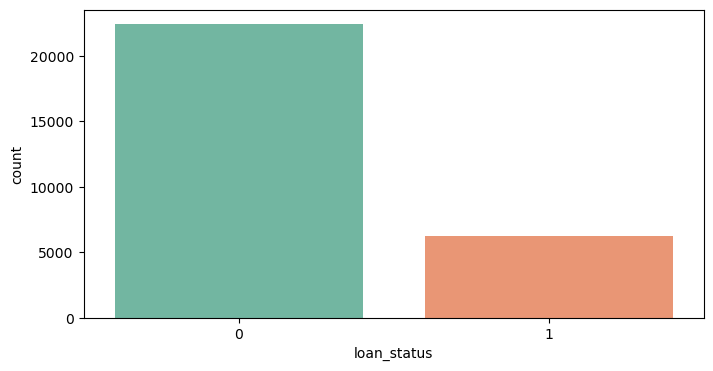

In [69]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='loan_status', palette='Set2')

<Axes: xlabel='person_age', ylabel='Count'>

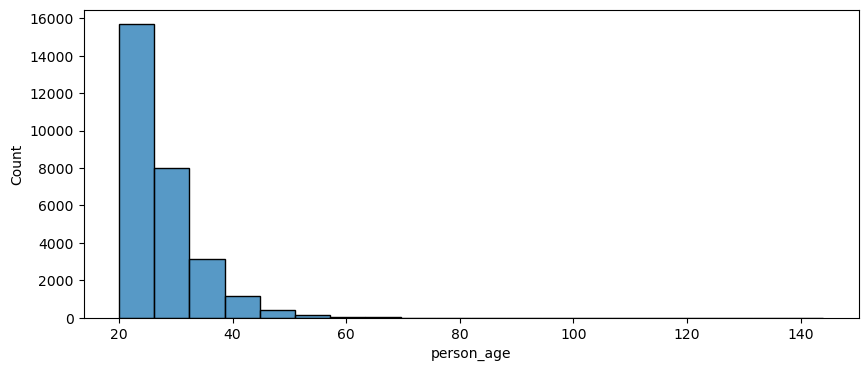

In [70]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='person_age', bins=20)

In [71]:
df[df['person_age']>=80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


In [72]:
df = df[df["person_age"]<80]

<Axes: xlabel='person_age', ylabel='Count'>

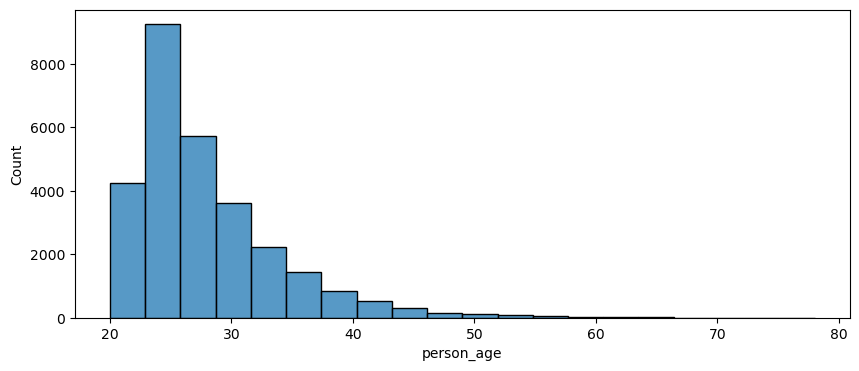

In [73]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='person_age', bins=20)

<Axes: xlabel='person_emp_length', ylabel='Count'>

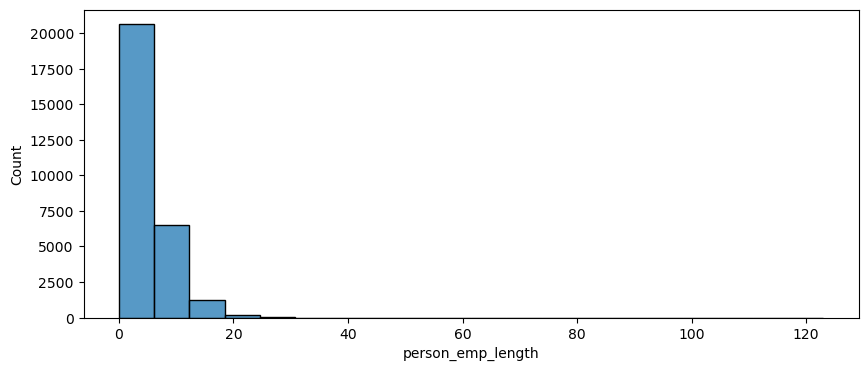

In [74]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='person_emp_length', bins=20)

In [75]:
df[df['person_emp_length']>=60]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [76]:
df = df[df['person_emp_length'] <= 60]

<Axes: xlabel='person_emp_length', ylabel='Count'>

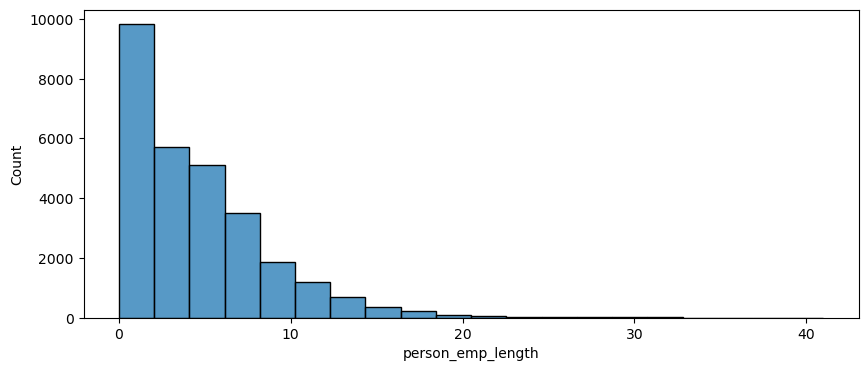

In [77]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='person_emp_length', bins=20)

In [78]:
df.duplicated().sum()

137

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [81]:
df.shape

(28493, 12)

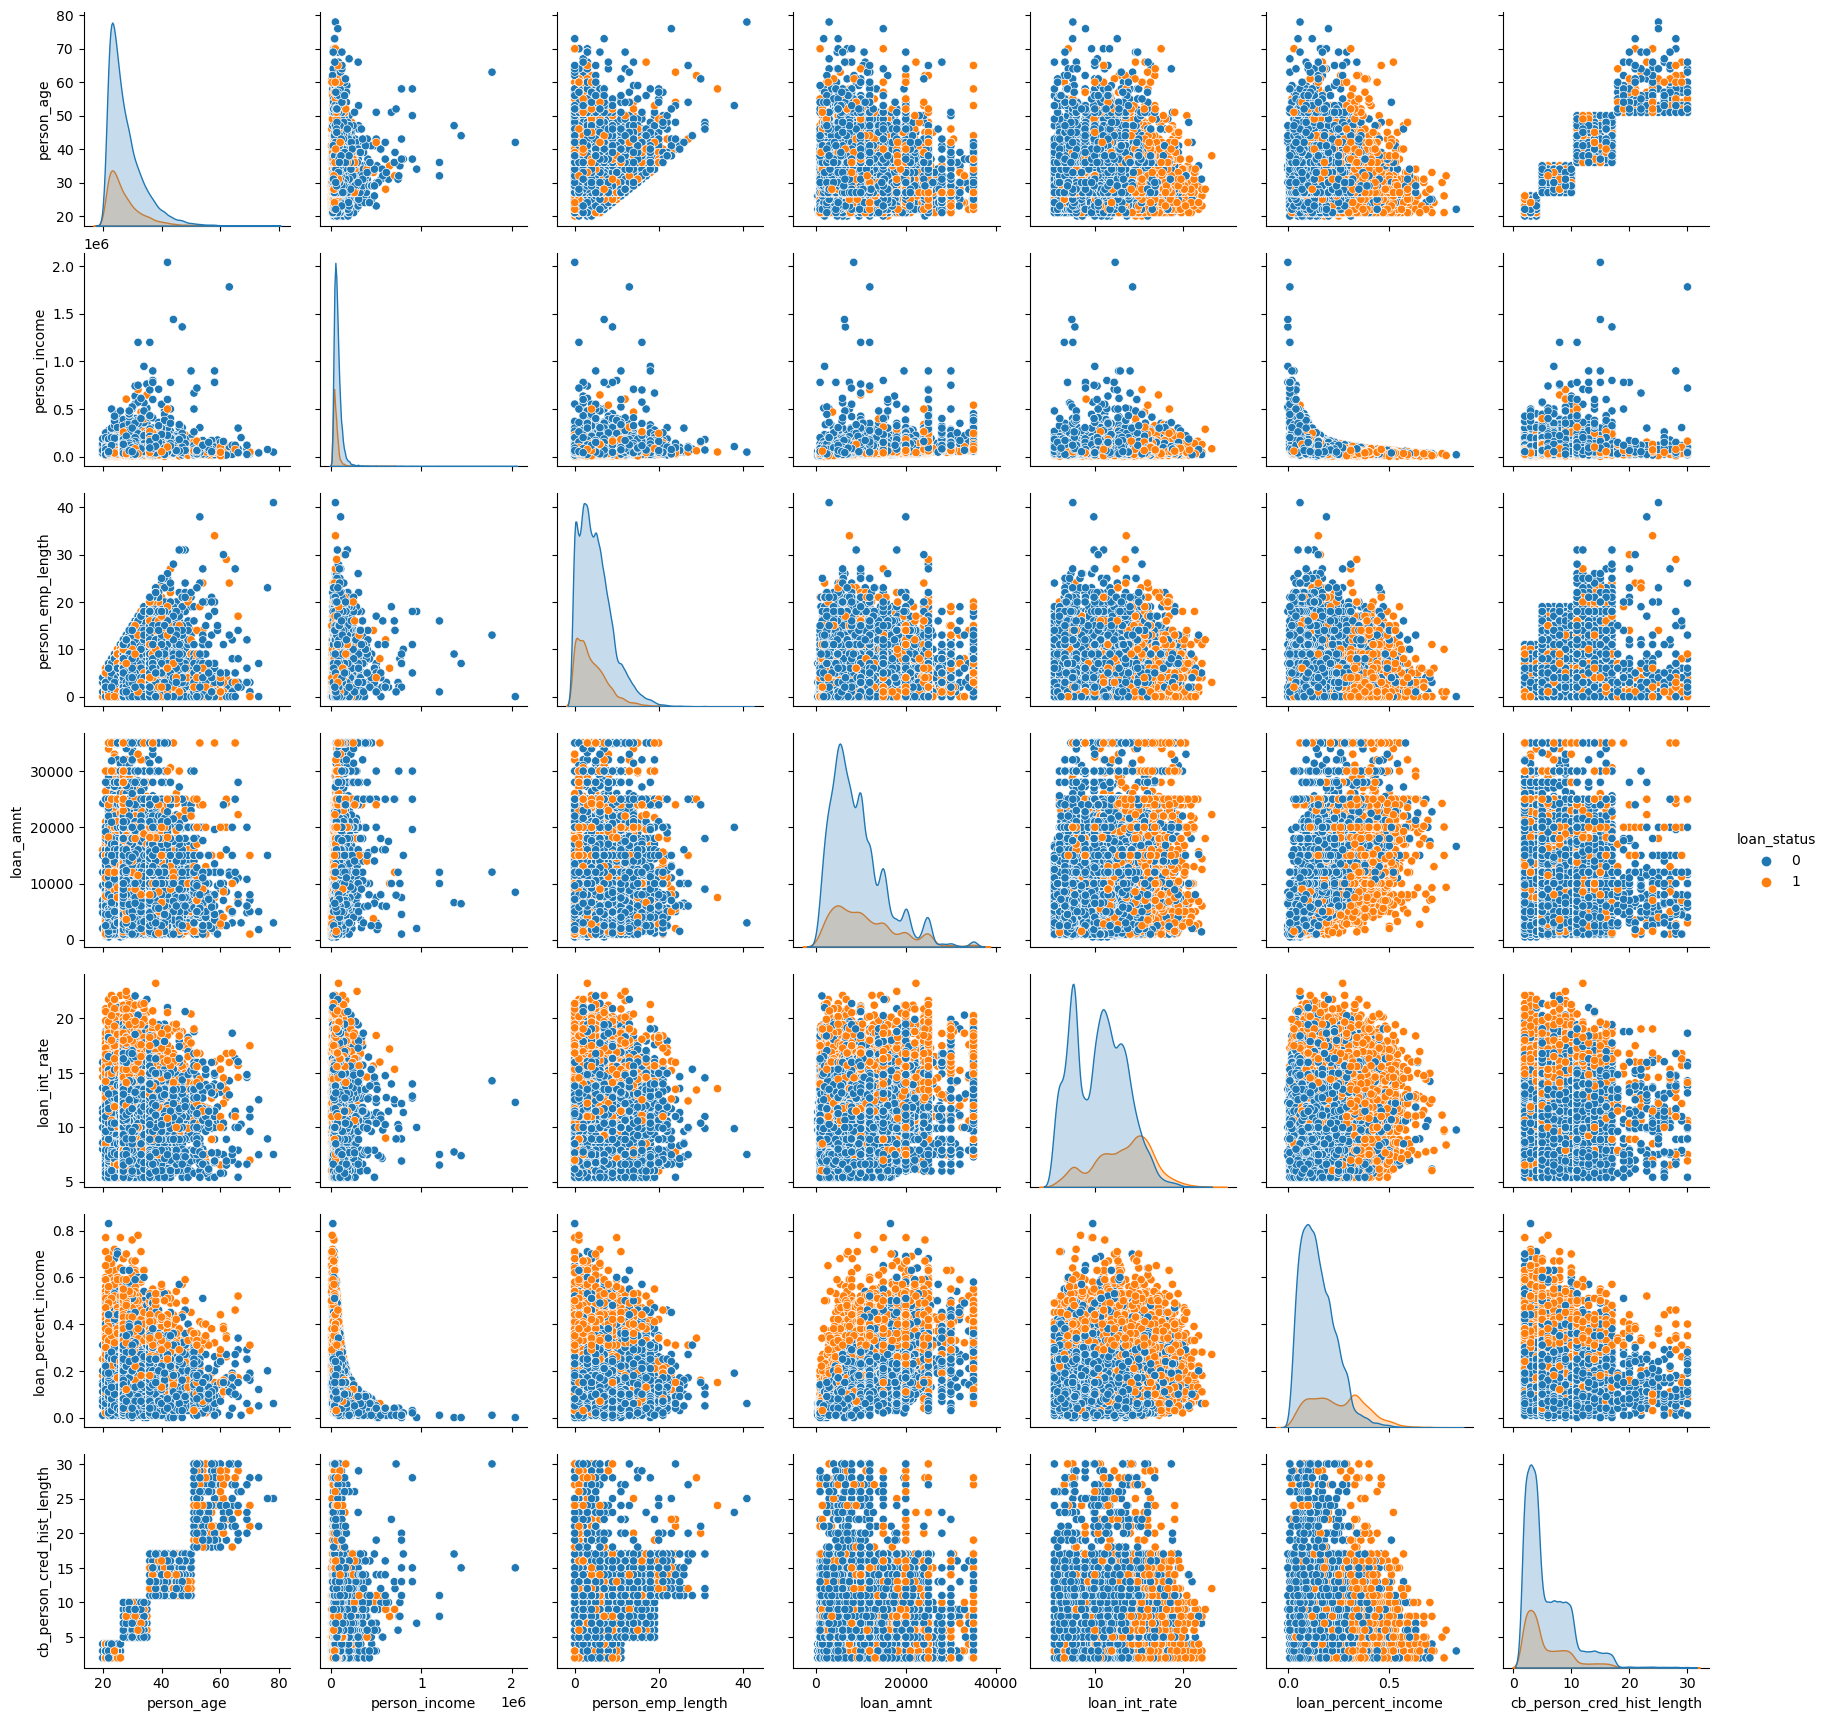

In [82]:
features = ['person_age', 'person_income', 'loan_amnt', 'person_emp_length', 'cb_person_cred_hist_length', 'loan_status']

sns.pairplot(df, hue='loan_status')

<Axes: xlabel='person_emp_length', ylabel='person_income'>

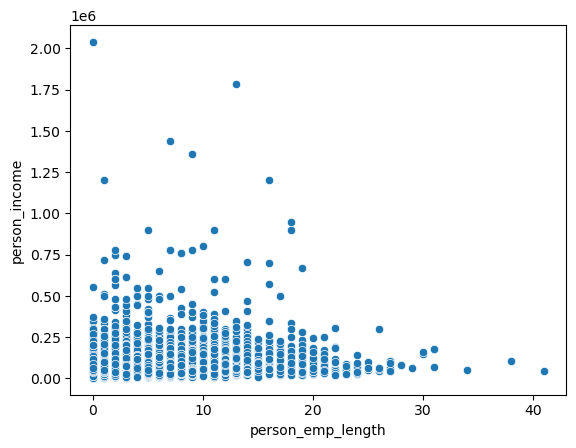

In [83]:
sns.scatterplot(x='person_emp_length', y='person_income', data=df)

<Axes: >

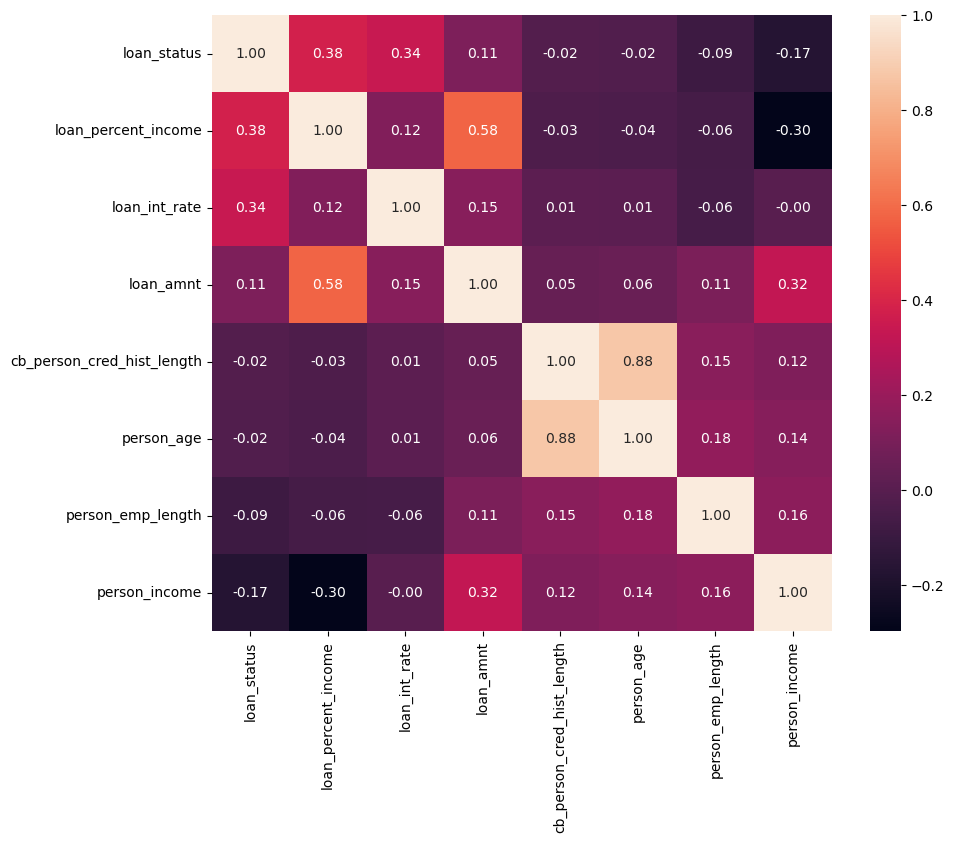

In [84]:
top_corr_features = df.select_dtypes(include='number').corr()['loan_status'].nlargest(11).index
corr_matrix = df[top_corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cbar=True, annot=True, fmt=".2f")

In [85]:
df_filtered = df[df['loan_status'] == 1]

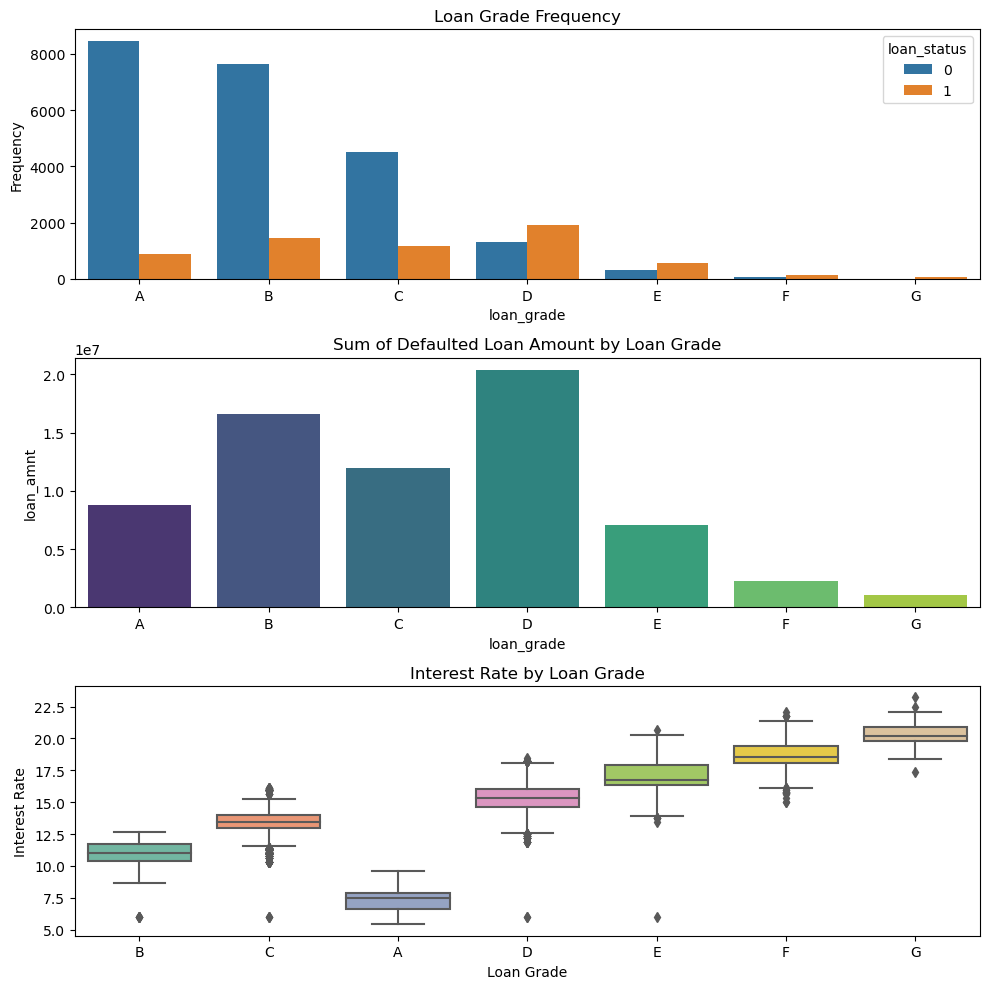

In [86]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))  # Adjust figsize for better spacing


# Loan Grade frequency
loan_grade_order=['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.countplot(data=df, x='loan_grade', hue='loan_status', order=loan_grade_order, ax=axes[0])
axes[0].set_xlabel('loan_grade')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Loan Grade Frequency')

# BoxPlot of Sum of Loan Amount by Loan Grade
loan_grade_sum = df_filtered.groupby('loan_grade')['loan_amnt'].sum().reset_index()
sns.barplot(x='loan_grade', y='loan_amnt', data=loan_grade_sum, palette='viridis', ax=axes[1])
axes[1].set_xlabel('loan_grade')
axes[1].set_ylabel('loan_amnt')
axes[1].set_title('Sum of Defaulted Loan Amount by Loan Grade')

sns.boxplot(data=df, x='loan_grade', y='loan_int_rate', palette='Set2', ax=axes[2])
axes[2].set_xlabel('Loan Grade')
axes[2].set_ylabel('Interest Rate')
axes[2].set_title('Interest Rate by Loan Grade')

plt.tight_layout()

Text(0.5, 1.0, 'F and G grades frequency with loan status')

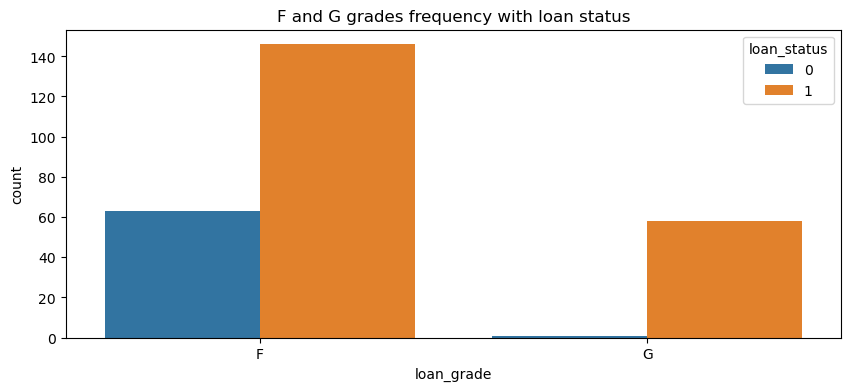

In [87]:
loan_grade_order=['F', 'G']
plt.figure(figsize=(10, 4))
sns.countplot( data=df[df['loan_grade'].isin(['F', 'G'])], x='loan_grade', hue='loan_status', order=loan_grade_order)
plt.title('F and G grades frequency with loan status')

Text(0.5, 1.0, 'Sum of Defaulted Loan Amount by Loan Intent')

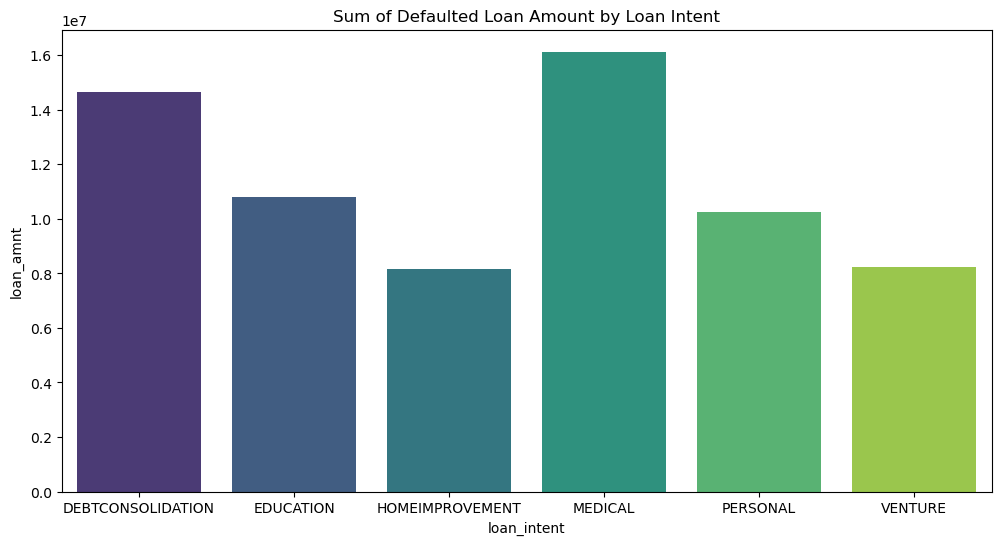

In [88]:
loan_intent_sum = df_filtered.groupby('loan_intent')['loan_amnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='loan_intent', y='loan_amnt', data=loan_intent_sum, palette='viridis')
plt.title('Sum of Defaulted Loan Amount by Loan Intent')

<Axes: xlabel='person_home_ownership', ylabel='loan_amnt'>

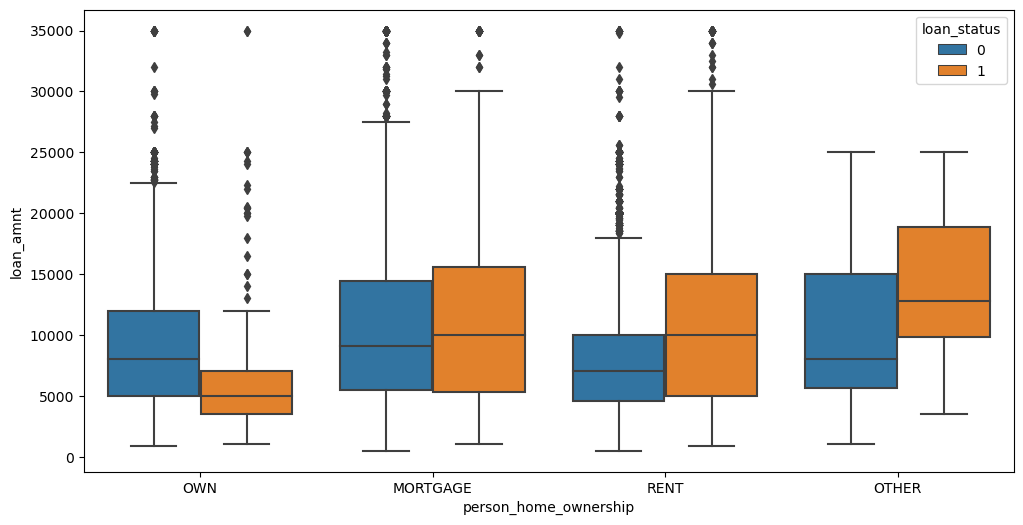

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='person_home_ownership', y='loan_amnt',hue='loan_status', data=df)

Text(0.5, 1.0, 'Sum of Defaulted Loan Amount by Home Ownership')

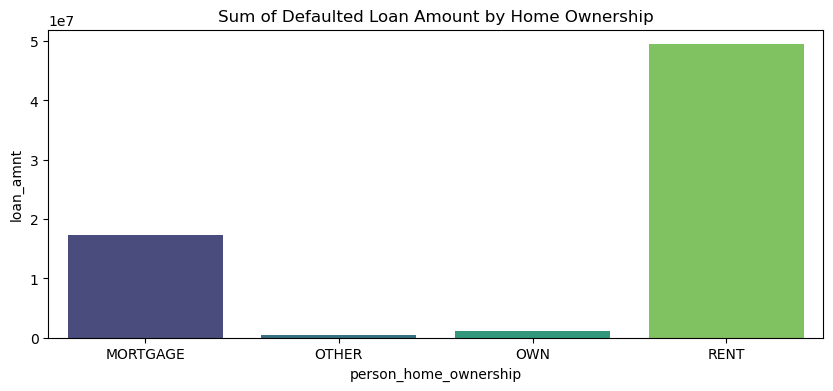

In [90]:
home_ownership_sum = df_filtered.groupby('person_home_ownership')['loan_amnt'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='person_home_ownership', y='loan_amnt', data=home_ownership_sum, palette='viridis')
plt.title('Sum of Defaulted Loan Amount by Home Ownership')

In [91]:
# Categorical features
df.select_dtypes(['object']).columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [92]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
df['loan_grade']= le.fit_transform(df['loan_grade'])

In [93]:
df.select_dtypes(['object']).columns

Index(['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], dtype='object')

In [94]:
df= pd.get_dummies(df, drop_first=True)

In [95]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
1,21,9600,5.0,1,1000,11.14,0,0.10,2,False,True,False,True,False,False,False,False,False
2,25,9600,1.0,2,5500,12.87,1,0.57,3,False,False,False,False,False,True,False,False,False
3,23,65500,4.0,2,35000,15.23,1,0.53,2,False,False,True,False,False,True,False,False,False
4,24,54400,8.0,2,35000,14.27,1,0.55,4,False,False,True,False,False,True,False,False,True
5,21,9900,2.0,0,2500,7.14,1,0.25,2,False,True,False,False,False,False,False,True,False


In [96]:
df.shape

(28493, 18)

In [97]:
df['loan_status'].value_counts()

loan_status
0    22306
1     6187
Name: count, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<Axes: xlabel='loan_status', ylabel='count'>

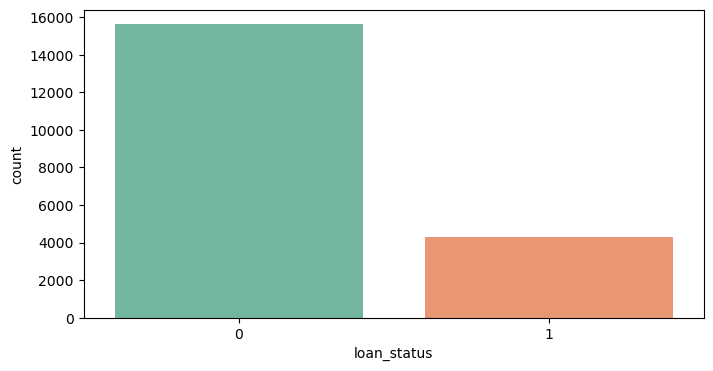

In [101]:
combined = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(8, 4))
sns.countplot(data=combined, x='loan_status', palette='Set2')

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

<Axes: xlabel='loan_status', ylabel='count'>

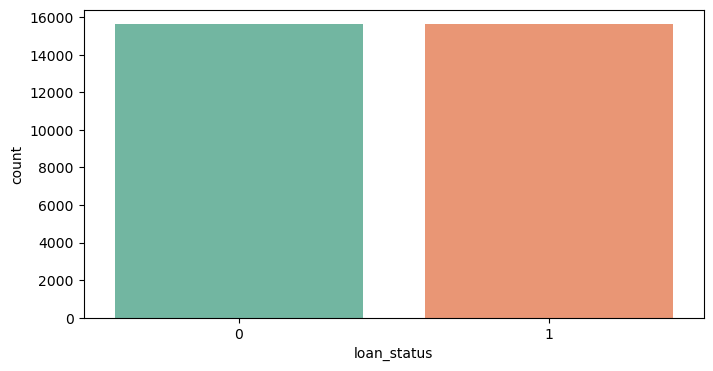

In [104]:
combined = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(8, 4))
sns.countplot(data=combined, x='loan_status', palette='Set2')

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report,roc_curve, auc

In [107]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

In [108]:
def model_evaluation(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    
    precision = precision_score(y_test, predictions)
    
    recall = recall_score(y_test, predictions)
    
    f1 = f1_score(y_test, predictions)
    
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    conf_matrix = confusion_matrix(y_test, predictions)
    
    class_report = classification_report(y_test, predictions)
    
    return accuracy, precision, recall, f1, roc_auc, conf_matrix, class_report

In [109]:
results = []
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Evaluation
    accuracy, precision, recall, f1, roc_auc, conf_matrix, class_report = model_evaluation(model, X_test, y_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })
    
    print(f"Confusion Matrix for {name}:\n\n{conf_matrix}")
    print("\n\n")
    print(f"Classification Report for {name}:\n\n{class_report}")
    print("\n\n")

Confusion Matrix for Logistic Regression:

[[5540 1137]
 [ 607 1264]]



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      6677
           1       0.53      0.68      0.59      1871

    accuracy                           0.80      8548
   macro avg       0.71      0.75      0.73      8548
weighted avg       0.82      0.80      0.80      8548




Confusion Matrix for Random Forest:

[[6418  259]
 [ 451 1420]]



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6677
           1       0.85      0.76      0.80      1871

    accuracy                           0.92      8548
   macro avg       0.89      0.86      0.87      8548
weighted avg       0.91      0.92      0.92      8548




Confusion Matrix for Decision Tree:

[[5868  809]
 [ 446 1425]]



Classification Report for Decision Tree:

 

In [110]:
results_df = pd.DataFrame(results)
print(results_df)

                      Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0       Logistic Regression  0.795976   0.526447  0.675575  0.591760  0.832925
1             Random Forest  0.916940   0.845742  0.758952  0.800000  0.928045
2             Decision Tree  0.853182   0.637869  0.761625  0.694275  0.820231
3                       SVC  0.856224   0.655825  0.722074  0.687357  0.887122
4                       KNN  0.863360   0.684321  0.697488  0.690842  0.865289
5               Naive Bayes  0.782405   0.502026  0.728487  0.594418  0.825810
6   Multinomial Naive Bayes  0.643776   0.332190  0.621058  0.432855  0.699956
7         Gradient Boosting  0.899275   0.778390  0.754677  0.766350  0.918096
8                  AdaBoost  0.841249   0.616500  0.726884  0.667157  0.879580
9                   Bagging  0.909453   0.838789  0.725815  0.778223  0.912572
10                  XGBoost  0.934605   0.929882  0.758418  0.835443  0.944912


In [111]:
best_model_name = results_df.loc[results_df['ROC AUC'].idxmax()]['Model']
print(f"Best model: {best_model_name}")

Best model: XGBoost


In [112]:
best_model = trained_models[best_model_name]
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [113]:
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='Blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label=f'Random classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve for best model ({best_model_name})')
    plt.legend(loc='lower right')
    plt.show()

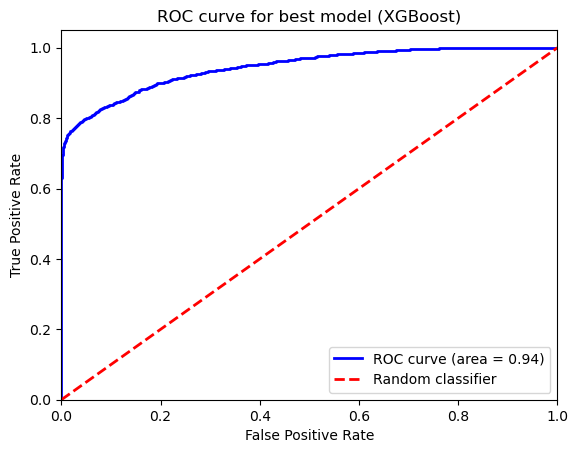

In [114]:
plot_roc_curve(best_model, X_test, y_test)